In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
colors = {"DCT": "#800515",
               "IC/DCT": "#bd5713",
               "Endothelium": "#63ad2d", 
               "PC": "#a4b507",
               "Immune": "black",
               "Podo": "#6e640e", 
               "Fibro": "#1c768a",
               "VSMC/Mes": "#3e9c72",
               "PT": "#448efc",
               "PT?": "#51657a", 
               "iPT": "#6f37b3",
               "PEC": "#ff0011",
               "TAL": "#b44dbf",
               "Injured TAL": "#e3126d",
               "nan": "#919191",
               "NA": "#919191"
         }

In [3]:
annotation_colors_disc = {"PT_S1": "#369ca3",
           "PT_S2": "#237dc2",
           "PT_S3": "#0a387d",
           "Des-Thin_Limb": "#323e73",
           "DTL": "#323e73",
           "iPT": "#7062f0",
           "PEC": "#9d17e6",
           "Podo":"#6b728c",
           "RBC":"#404040",
           "Baso/Mast":"#006655",
           "M_TAL":"#c717e6",
           "C_TAL":"#6e0980",
           "DLOH":"#d400c2",
           "ATL":"#d400c2",
           "Macula_Densa":"#75225e",
           "DCT":"#ff2e7e",
           "DCT1":"#ff2e7e",
           "DCT2":"#d60024",
           "CNT":"#e34c3b",
           "PC":"#6e2218",
           "IC_B":"#db6d3d",
           "IC_A":"#fc7200",
           "Endo_GC": "#439450",
           "Endo_Peritubular":"#1be03c",
           "Endo_Lymphatic": "#038236",
           "Enod_Lym": "#038236",
           "Fibroblast":"#117a56",
           "Fib_1":"#117a56",
           "Fib":"#117a56",
           "Fibroblast_2":"#204a21",
           "Mes":"#507550",
           "MyoFib/VSMC":"#00804a",
           "MyoFib":"#25ba7c",
           "VSMC/Pericyte":"#00804a",
           "GS_Stromal":"#688764",
           "Neural_Cells":"#757575",
           "CD4T":"#665200",
           "Prolif_Lym":"#aba730",
           "CD8T":"#577030",
           "NK":"#89945a",
           "Mac":"#54541f",
           "Neutrophil":"#757550",
           "B_Naive": "#e0c53a",
           "Plasma Cells": "#756013",
           "Plasma_Cells": "#756013",
           "CD14_Mono": "#3d3517",
           "CD16_Mono": "#51661d",
           "B_Cells": "#9aad39",
           "pDC": "#ada37d",
           "cDC": "#635e48",
           "nan": "#919191",
           "NA": "#919191"
          }

In [4]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/postSCVI/7_13_23slide0_PostSCVI_4_30_snRNA.h5ad")

In [5]:
print(adata)

AnnData object with n_obs × n_vars = 714248 × 975
    obs: 'sample', 'orig_ident', 'type', 'Idents', 'tech', 'Cluster_Idents', 'cellType_CosMx_1', 'percent_mt', 'leiden_1', 'leiden_3', 'x_slide_mm', 'y_slide_mm', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'probe-0', 'custom_probes-0', 'orig_probes-0', 'green_counts-0', 'blue_counts-0', 'red_counts-0', 'yellow_counts-0', 'n_cells-0', 'vst.mean-0-1', 'vst.variance-0-1', 'vst.variance.expected-0-1', 'vst.variance.standardized-0-1', 'vst.variable-0-1', 'vst.mean-1-1', 'vst.variance-1-1', 'vst.variance.expected-1-1', 'vst.variance.standardized-1-1', 'vst.variable-1-1', 'name-2-1', 'n_counts-1'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'tech_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


In [6]:
adata.obs["tech"].value_counts()

tech
cosmx     558601
SN_RNA    155647
Name: count, dtype: int64

In [7]:
adata.obs["cellType_CosMx_1"].value_counts()

cellType_CosMx_1
PT             167722
nan            155647
TAL             75458
Fibro           70389
Endothelium     52335
Immune          40993
PC              37993
IC/DCT          25426
Injured TAL     24028
DCT             22763
iPT             18183
Podo             8920
VSMC/Mes         8636
PEC              5755
Name: count, dtype: int64

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


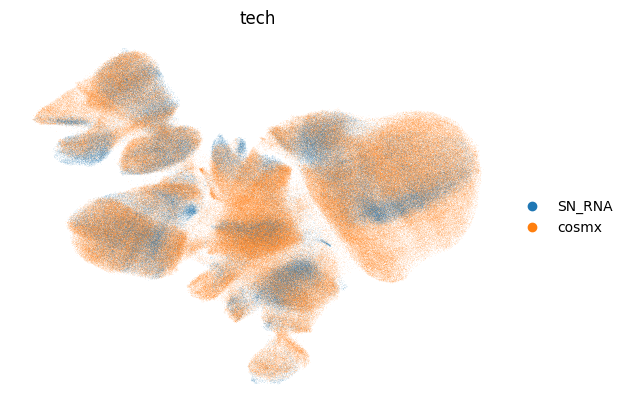

In [8]:
sc.pl.umap(adata, color = "tech",frameon = False)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


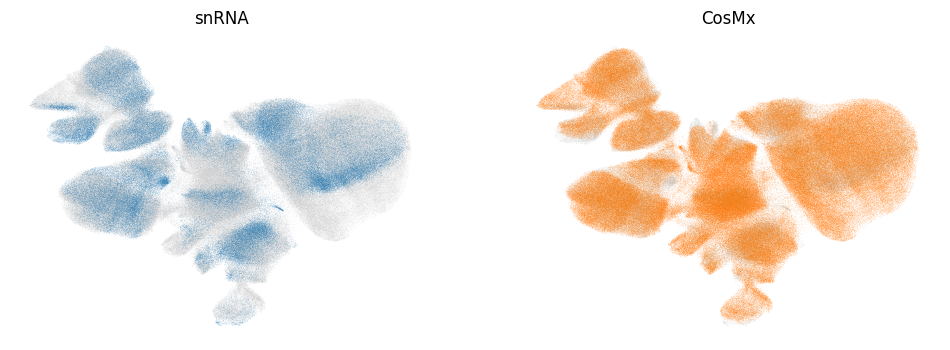

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sc.pl.umap(adata, color = "tech", groups = "SN_RNA",frameon = False, legend_loc = False, title = "snRNA", show = False, ax = axes[0])
sc.pl.umap(adata, color = "tech", groups = "cosmx",frameon = False, legend_loc = False, title = "CosMx", show = False, ax = axes[1])
plt.axis('off')
plt.show()

sc.pl.umap(adata, color = "cellType_CosMx_1",palette = colors, frameon = False, legend_loc = 'on data', legend_fontsize=10, legend_fontoutline=2, groups = ["DCT","IC/DCT", "Endothelium","PC","Immune", "Podo","Fibro","VSMC/Mes","PT","iPT","PEC","TAL","Injured TAL"])

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plot

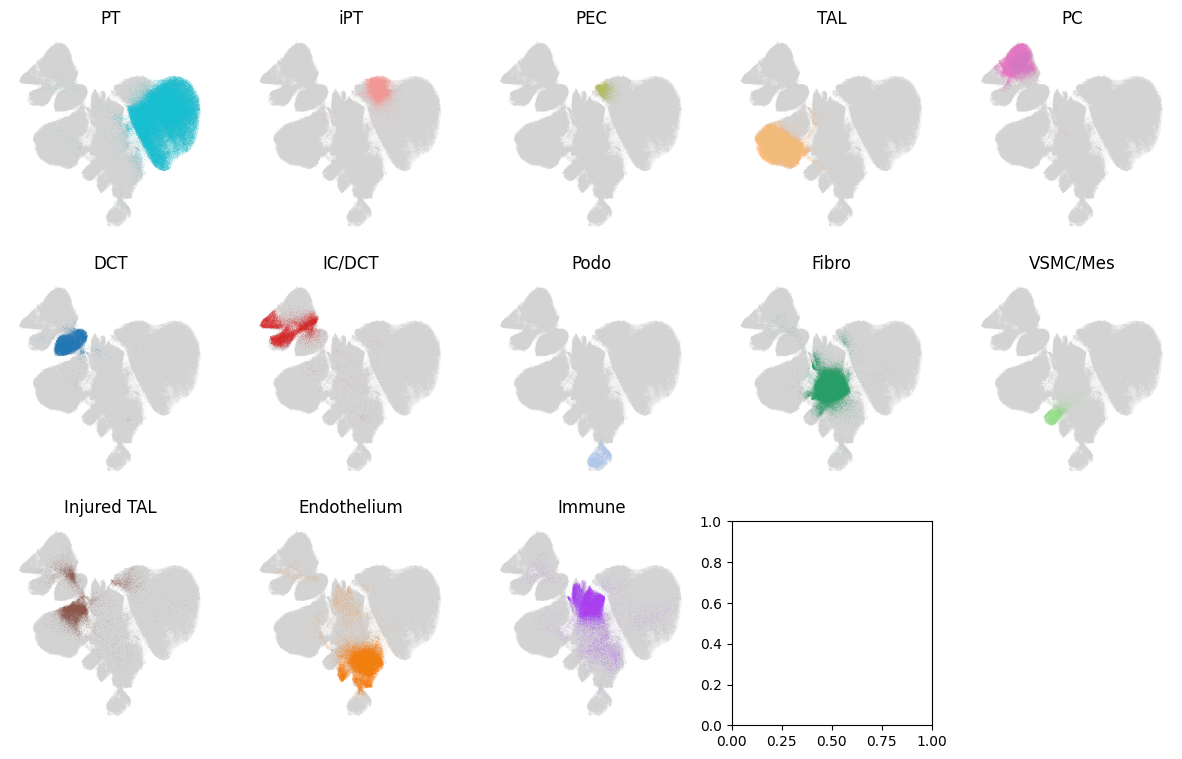

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "PT",frameon = False, legend_loc = False, title = "PT", show = False, ax = axes[0,0])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "iPT",frameon = False, legend_loc = False, title = "iPT", show = False, ax = axes[0,1])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "PEC",frameon = False, legend_loc = False, title = "PEC", show = False, ax = axes[0,2])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "TAL",frameon = False, legend_loc = False, title = "TAL", show = False, ax = axes[0,3])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "PC",frameon = False, legend_loc = False, title = "PC", show = False, ax = axes[0,4])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "DCT",frameon = False, legend_loc = False, title = "DCT", show = False, ax = axes[1,0])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "IC/DCT",frameon = False, legend_loc = False, title = "IC/DCT", show = False, ax = axes[1,1])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Podo",frameon = False, legend_loc = False, title = "Podo", show = False, ax = axes[1,2])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Fibro",frameon = False, legend_loc = False, title = "Fibro", show = False, ax = axes[1,3])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "VSMC/Mes",frameon = False, legend_loc = False, title = "VSMC/Mes", show = False, ax = axes[1,4])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Injured TAL",frameon = False, legend_loc = False, title = "Injured TAL", show = False, ax = axes[2,0])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Endothelium",frameon = False, legend_loc = False, title = "Endothelium", show = False, ax = axes[2,1])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Immune",frameon = False, legend_loc = False, title = "Immune", show = False, ax = axes[2,2])
plt.axis('off')
plt.show()

In [11]:
print(adata.obs["cellType_CosMx_1"].value_counts())

cellType_CosMx_1
PT             167722
nan            155647
TAL             75458
Fibro           70389
Endothelium     52335
Immune          40993
PC              37993
IC/DCT          25426
Injured TAL     24028
DCT             22763
iPT             18183
Podo             8920
VSMC/Mes         8636
PEC              5755
Name: count, dtype: int64


In [12]:
print(adata.obs["Idents"].value_counts())

Idents
nan                 558601
PT_S1                27282
NA                   17278
C_TAL                16135
Endo_Peritubular     12131
iPT                  11290
DCT1                  9512
PC                    8527
IC_A                  6771
CD4T                  5240
CNT                   5044
M_TAL                 4896
PT_S3                 4817
Fibroblast            4633
Endo_GC               3799
PT_S2                 2831
Mes                   2546
PEC                   2363
IC_B                  1972
Podo                  1936
B_Cells               1920
DCT2                  1284
GS_Stromal            1190
Macula_Densa          1047
DLOH                   915
Endo_Lymphatic         237
Neural_Cells            51
Name: count, dtype: int64


In [13]:
notAnnotated = ["NA"]
Proxtubule = ["PT_S1","PT_S2","PT_S3","iPT"]
LOH = ["C_TAL","M_TAL","DLOH"]
distTubule = ["DCT1","DCT2","CNT","IC_A","IC_B","PC"]
immune = ["CD4T","B_Cells","Baso/Mast"]
endo = ["Endo_Peritubular","Endo_Lymphatic","Endo_GC"]
stroma = ["Fibroblast","GS_Stromal","Mes"]
specialized = ["Podo","PEC","Macula_Densa"]
other = ["Neural_Cells"]

dissociatedPop = Proxtubule + LOH + distTubule + immune + endo + stroma + specialized

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


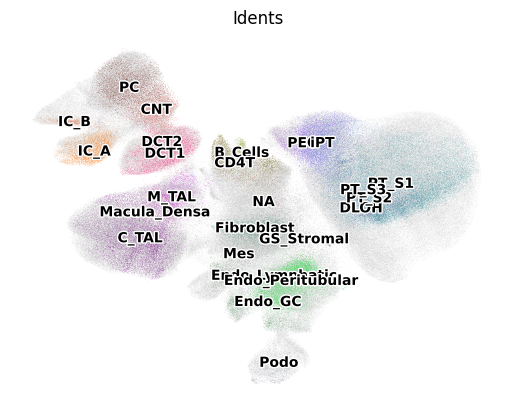

In [14]:
sc.pl.umap(adata, color = "Idents", frameon = False, legend_loc = 'on data',palette = annotation_colors_disc, legend_fontsize=10, legend_fontoutline=2, groups = dissociatedPop)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


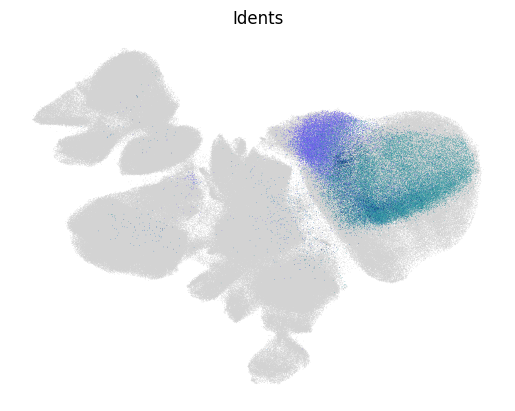

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


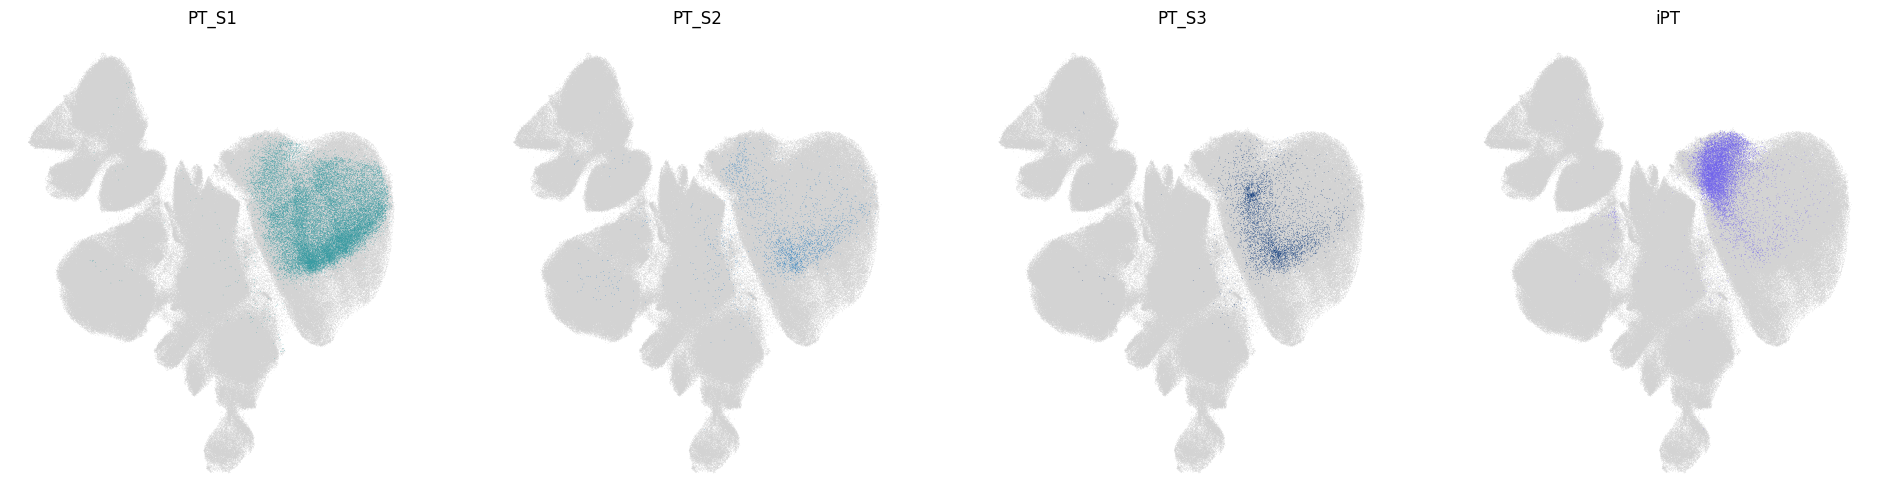

In [15]:
sc.pl.umap(adata, groups = Proxtubule, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(Proxtubule), figsize=(len(Proxtubule)*6,6))
for j,i in enumerate(Proxtubule):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j], size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


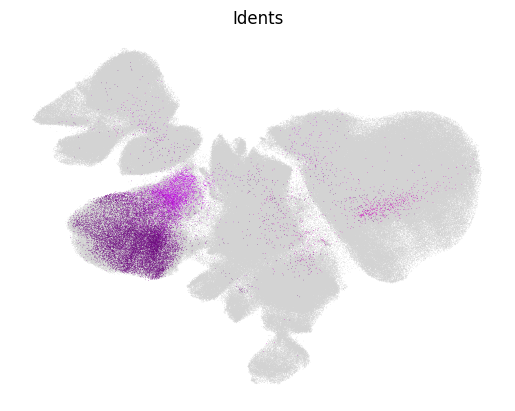

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


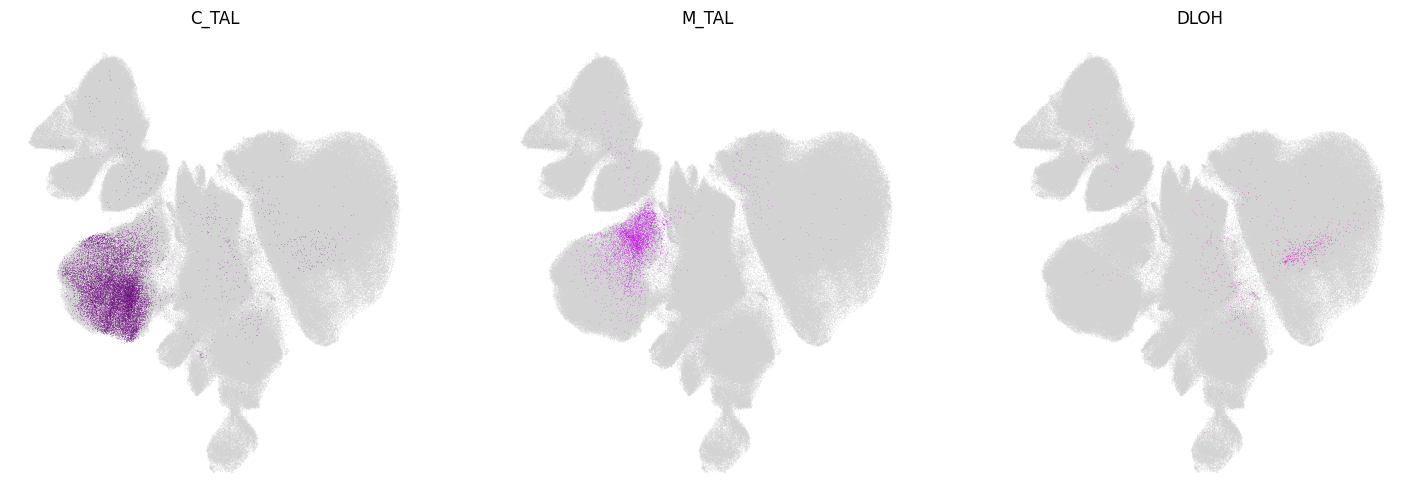

In [16]:
sc.pl.umap(adata, groups = LOH, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(LOH), figsize=(len(LOH)*6,6))
for j,i in enumerate(LOH):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


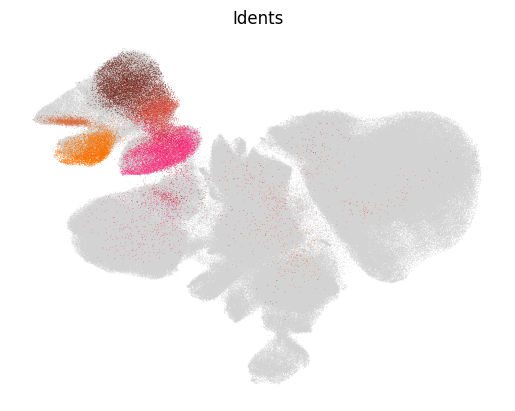

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plot

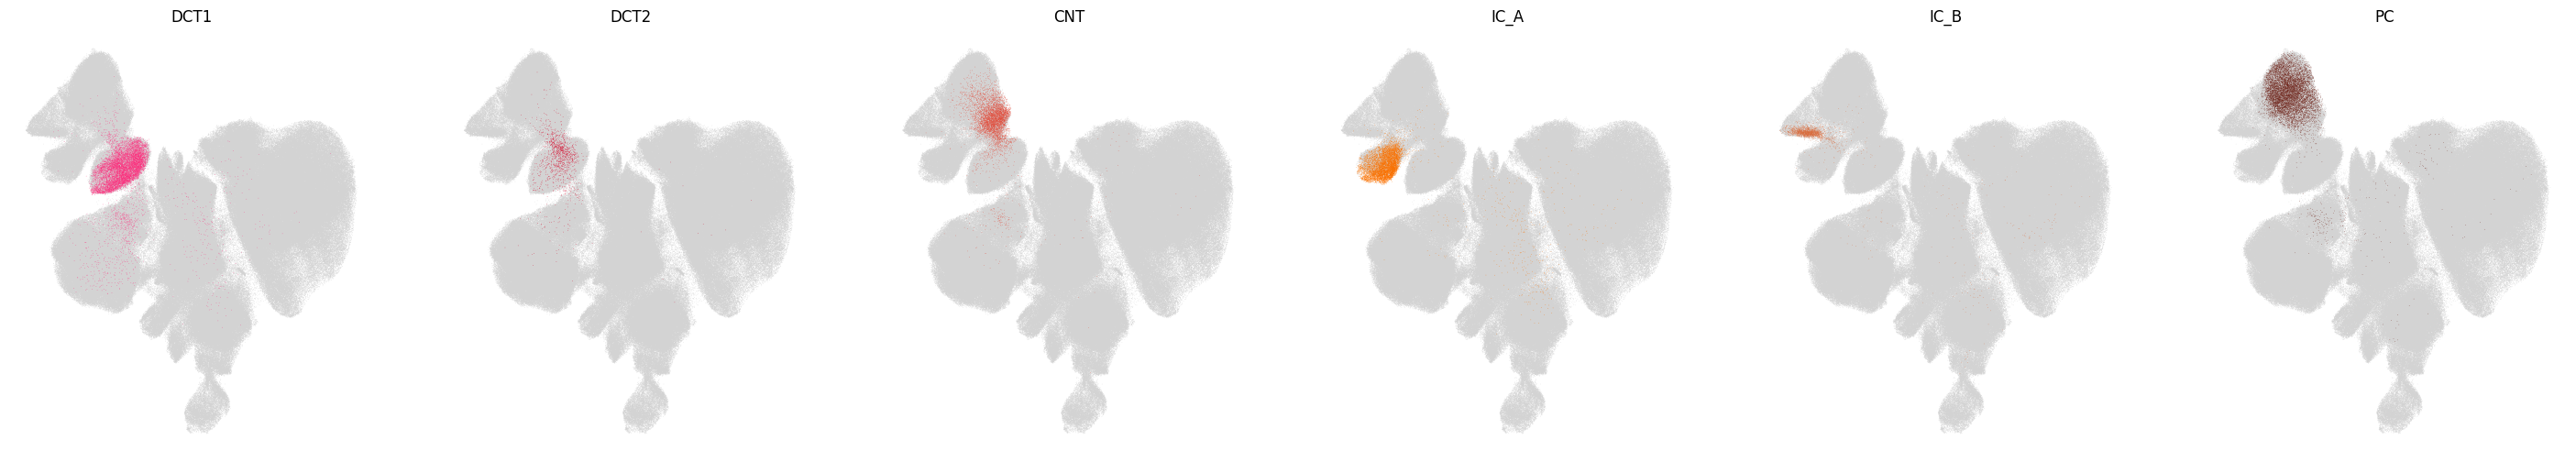

In [17]:
sc.pl.umap(adata, groups = distTubule, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(distTubule), figsize=(len(distTubule)*6,6))
for j,i in enumerate(distTubule):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


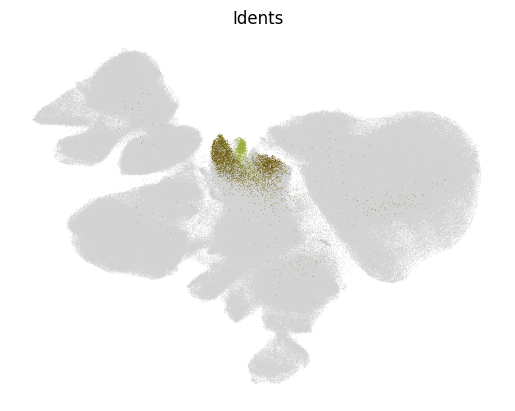

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


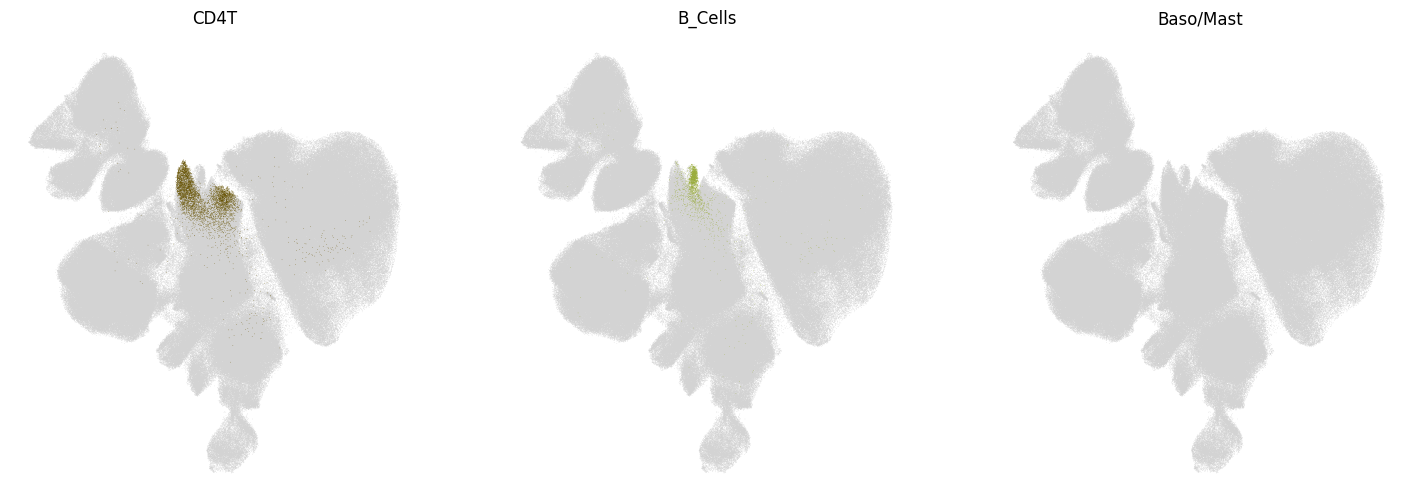

In [18]:
sc.pl.umap(adata, groups = immune, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(immune), figsize=(len(immune)*6,6))
for j,i in enumerate(immune):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j], size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


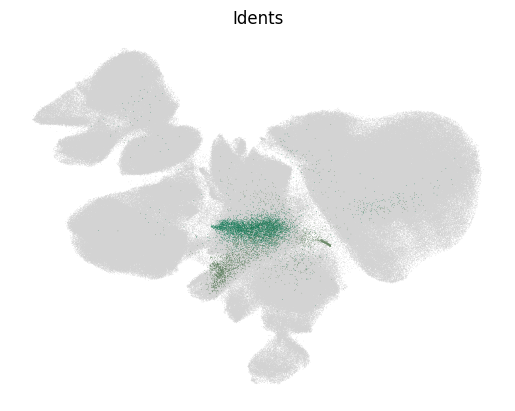

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


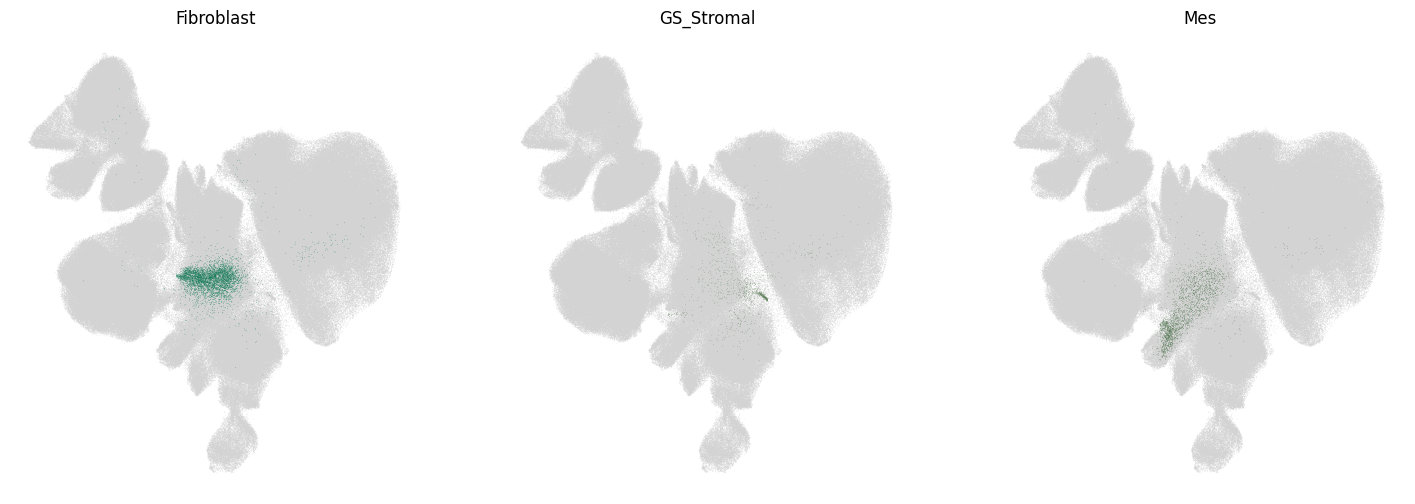

In [19]:
sc.pl.umap(adata, groups = stroma, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(stroma), figsize=(len(stroma)*6,6))
for j,i in enumerate(stroma):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


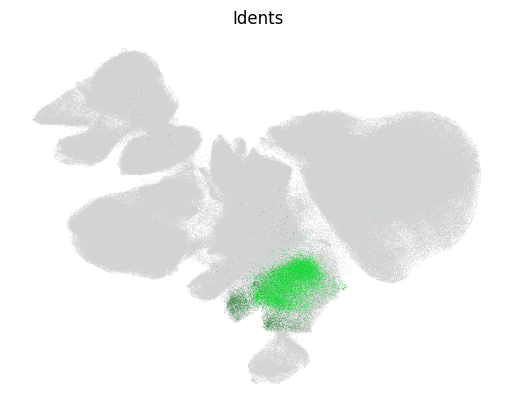

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


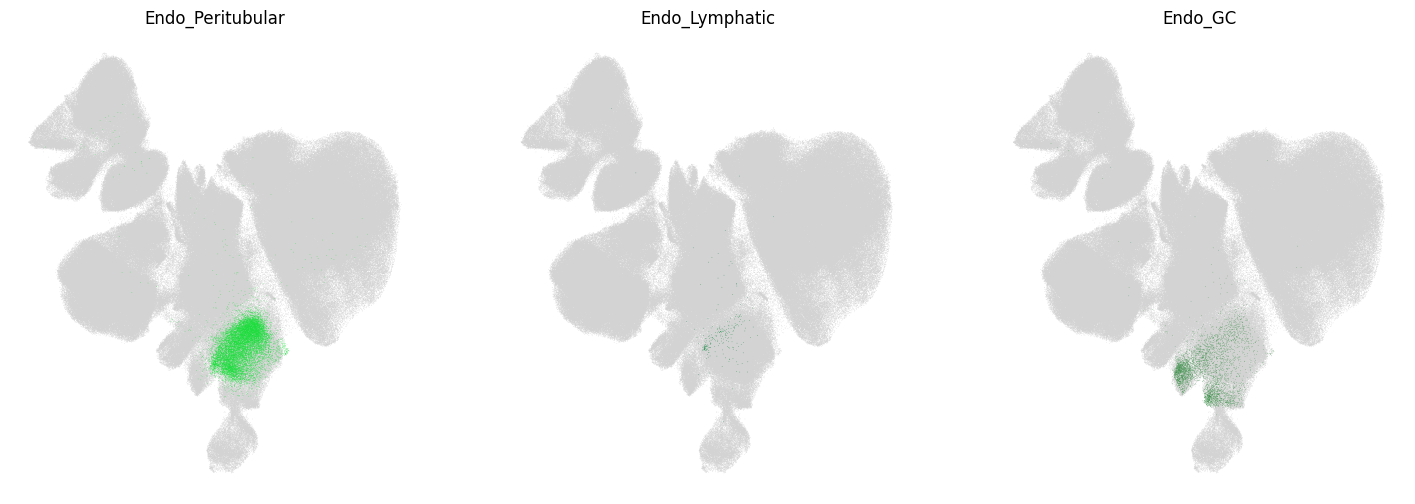

In [20]:
sc.pl.umap(adata, groups = endo, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(endo), figsize=(len(endo)*6,6))
for j,i in enumerate(endo):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


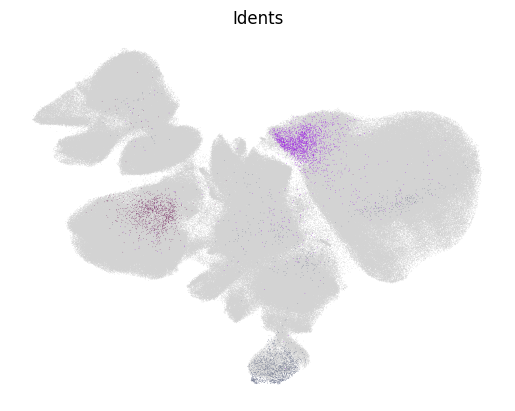

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


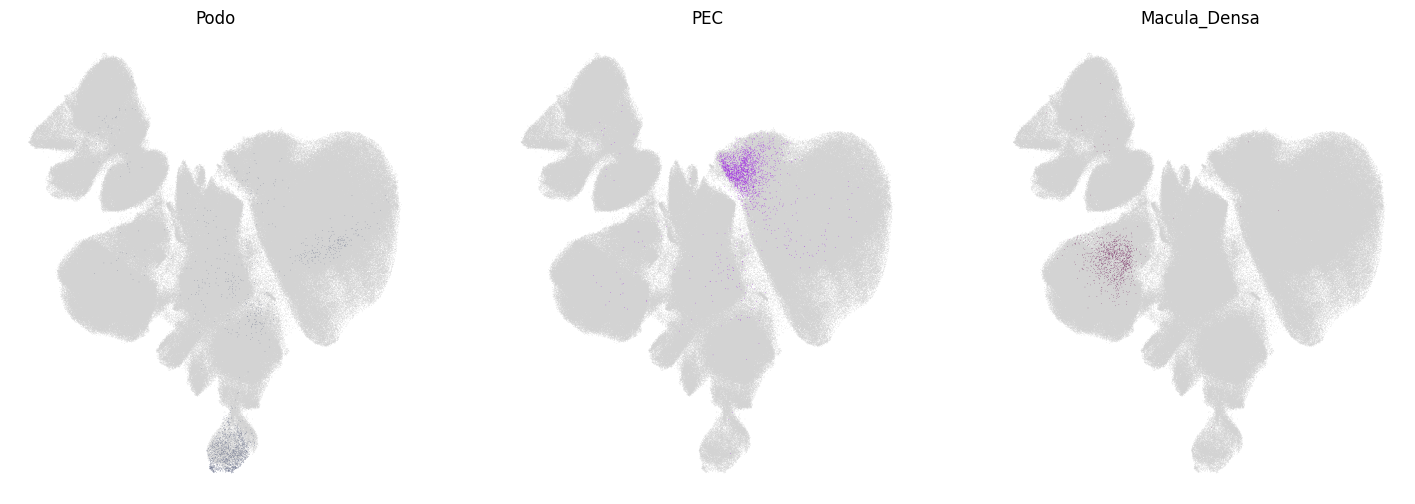

In [21]:
sc.pl.umap(adata, groups = specialized, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(specialized), figsize=(len(specialized)*6,6))
for j,i in enumerate(specialized):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


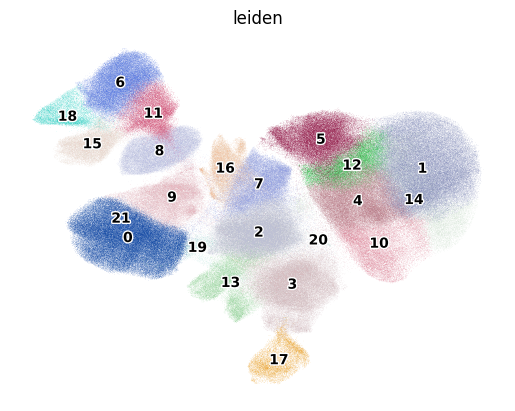

In [22]:
sc.pl.umap(adata, color = "leiden", legend_loc='on data', legend_fontsize=10, legend_fontoutline=2, frameon = False)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


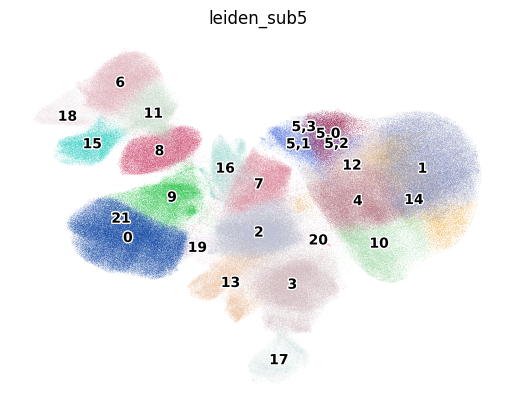

In [23]:
sc.tl.leiden(adata, restrict_to=('leiden', ['5']), resolution=0.3, key_added='leiden_sub5')
sc.pl.umap(adata, color = "leiden_sub5", legend_loc='on data', legend_fontsize=10, legend_fontoutline=2, frameon = False)

In [24]:
adata = adata[adata.obs['leiden'].isin(['19','20']) == False]
adata = adata[adata.obs['tech'] == "cosmx"]

In [25]:
adata.obs["sample"].value_counts()

sample
HK3039    282280
HK2844    273192
Name: count, dtype: int64

In [26]:
adata_disease = adata[adata.obs["sample"]== "HK2844"]
print(adata_disease.obs["leiden"].value_counts())
adata_healthy = adata[adata.obs["sample"]== "HK3039"]
print(adata_healthy.obs["leiden"].value_counts())

leiden
2     45227
1     35648
3     25836
0     23385
4     19971
5     19232
6     18461
7     18224
9     16508
13    10884
12     8882
16     6888
14     5269
11     5013
15     4507
8      3725
10     2119
17     1917
18     1487
21        9
Name: count, dtype: int64
leiden
0     48691
1     31565
10    22456
3     22282
8     19140
4     18892
2     16092
6     14389
7     12473
11    11443
5     10843
14    10605
12     8634
17     7811
13     6771
18     6233
15     5946
16     5012
9      2976
21       26
Name: count, dtype: int64


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


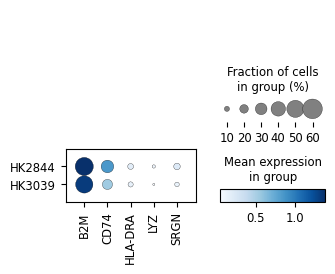

In [27]:
markers = [ "B2M","CD74","HLA-DRA","LYZ","SRGN"]
           
sc.pl.dotplot(adata, markers, groupby='sample', cmap='Blues', log = False)


/tmp/ipykernel_141023/2232894402.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cellType_CosMx_1"] = adata.obs['leiden_sub5'].map(cell_identities).astype('category')
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


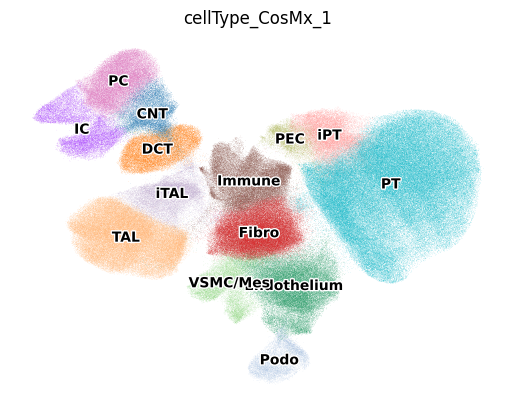

In [28]:
cell_identities = {'0': 'TAL', '1': 'PT', '2': 'Fibro', '3': 'Endothelium', '4': 'PT', '5,1': 'PEC', '5,0':'iPT','5,2':'iPT','5,3':'iPT','5,4':'iPT','5,5':'iPT','6': 'PC', '7': 'Immune', '8': 'DCT', '9': 'iTAL', '10': 'PT', '11':'CNT', '12': 'PT', '13': 'VSMC/Mes', '14': 'PT', '15': 'IC', '16': 'Immune', '17':'Podo', '18':"IC", '21':'TAL'}
adata.obs["cellType_CosMx_1"] = adata.obs['leiden_sub5'].map(cell_identities).astype('category')
sc.pl.umap(adata, color = "cellType_CosMx_1", legend_loc='on data', legend_fontsize=10, legend_fontoutline=2, frameon = False)

In [29]:
df = adata.obs["cellType_CosMx_1"].value_counts().to_frame()
df.index = adata.obs["cellType_CosMx_1"].value_counts().index

df['sampleBreakdown'] = object
df['sampleOrder_connectivity'] = object
df['nn1'] = object
df['nn20'] = object
df['nn100'] = object
df['micron20'] = object


print(df.index)

new_order = [0,7,13,1,8,6,5,11,9,12,2,10,3,4]
df = df.reindex(df.index[new_order])

print(df.index)

CategoricalIndex(['PT', 'TAL', 'Fibro', 'Endothelium', 'Immune', 'PC', 'DCT',
                  'iPT', 'iTAL', 'IC', 'VSMC/Mes', 'CNT', 'Podo', 'PEC'],
                 categories=['CNT', 'DCT', 'Endothelium', 'Fibro', ..., 'TAL', 'VSMC/Mes', 'iPT', 'iTAL'], ordered=False, dtype='category', name='cellType_CosMx_1')
CategoricalIndex(['PT', 'iPT', 'PEC', 'TAL', 'iTAL', 'DCT', 'PC', 'CNT', 'IC',
                  'Podo', 'Fibro', 'VSMC/Mes', 'Endothelium', 'Immune'],
                 categories=['CNT', 'DCT', 'Endothelium', 'Fibro', ..., 'TAL', 'VSMC/Mes', 'iPT', 'iTAL'], ordered=False, dtype='category', name='cellType_CosMx_1')


                   count                            sampleBreakdown  \
cellType_CosMx_1                                                      
PT                164041   [0.43823800147524095, 0.561761998524759]   
iPT                21706   [0.7106330046991616, 0.2893669953008385]   
PEC                 8369  [0.45489305771298844, 0.5451069422870116]   
TAL                72111    [0.3244165245246911, 0.675583475475309]   
iTAL               19484  [0.8472592896735783, 0.15274071032642167]   
DCT                22865   [0.1629127487426197, 0.8370872512573803]   
PC                 32850   [0.5619786910197869, 0.4380213089802131]   
CNT                16456  [0.30463052989790956, 0.6953694701020904]   
IC                 18173   [0.3298299675342541, 0.6701700324657459]   
Podo                9728  [0.19706003289473684, 0.8029399671052632]   
Fibro              61319  [0.7375691058236435, 0.26243089417635646]   
VSMC/Mes           17655    [0.6164825828377231, 0.383517417162277]   
Endoth

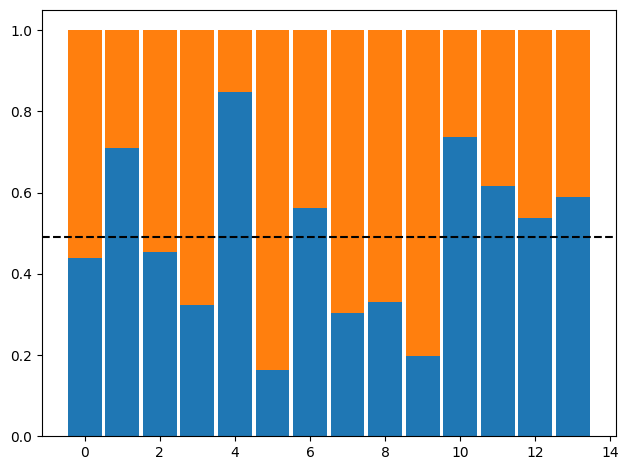

In [30]:
for i in df.index:
    counts_sample = []
    for j in adata.obs["sample"].unique():
        counts_sample.append(adata.obs[(adata.obs['sample'] == j) & (adata.obs['cellType_CosMx_1'] == i)].shape[0])
    sumtotal = (df.loc[i,"count"])
    counts_sample = list(map(lambda x: x / sumtotal, counts_sample))
    df.at[i,'sampleBreakdown'] = counts_sample

print(df)

# Set the width of each bar and the space between the bars
width = 0.9

# Loop over each cell type and create a stacked bar plot of the "sample" category
for i, cell_type in enumerate(df.index):
    ind = np.arange(1)
    S1 = df.sampleBreakdown[i]

    palette = plt.cm.get_cmap('tab10')
    bottom = 0
    for j in range(len(S1)):
          plt.bar(i, S1[j],bottom = bottom, width = width, color = palette(j))
          bottom = bottom + S1[j]
    # Show the plot
plt.tight_layout()
plt.axhline(y=0.49, color='black', linestyle = 'dashed')

plt.show()